In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('wine_dataset.csv')
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# Question 1

In [4]:
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,red
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,red
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,red
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,red
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,red
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,red
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,red
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,red


Le jeu de données contient 13 variables et 6497 exemples.

In [5]:
data = data.drop(columns=['quality'])

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


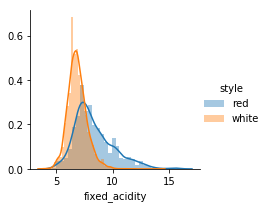

In [6]:
g = sns.FacetGrid(data=data, hue='style')
g.map(sns.distplot, 'fixed_acidity').add_legend()
plt.show()

<Figure size 432x288 with 0 Axes>

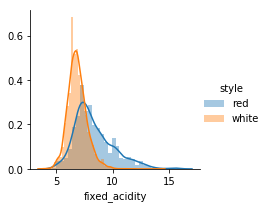

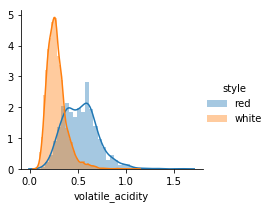

In [7]:
fig = plt.figure()

fig.add_subplot()
g = sns.FacetGrid(data=data, hue='style')
g.map(sns.distplot, 'fixed_acidity').add_legend()

fig.add_subplot()
g = sns.FacetGrid(data=data, hue='style')
g.map(sns.distplot, 'volatile_acidity').add_legend()

# Question 2

<Figure size 432x288 with 0 Axes>

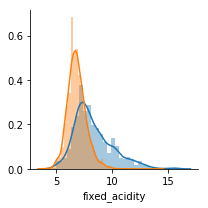

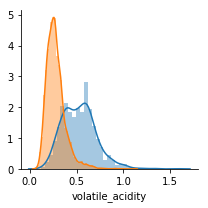

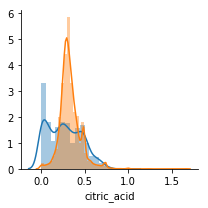

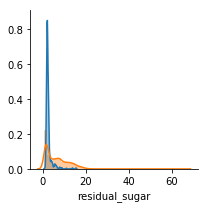

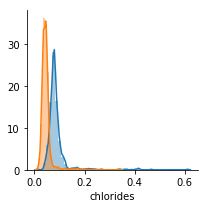

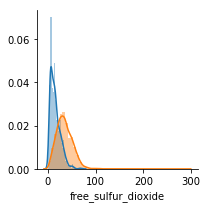

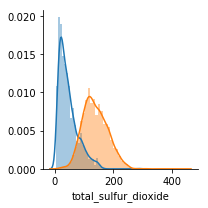

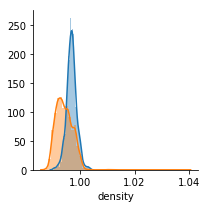

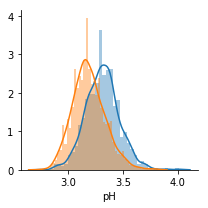

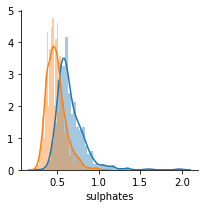

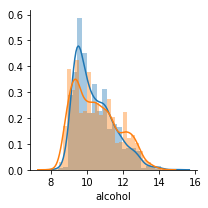

In [8]:
fig = plt.figure()
for col in data.columns.drop('style'):
   fig.add_subplot()
   g = sns.FacetGrid(data=data, hue='style')
   g.map(sns.distplot, col)
plt.show()
    

# Question 3

Il semble raisonnable de sélectionner les variables explicatives `volatile_acidity`, `chlorides`, `free_sulfur_dioxide`, `total_sulfur_dioxide`.

In [9]:
data_reduced = data[['volatile_acidity', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'style']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_reduced.drop(columns='style'), data_reduced['style'])

# Question 4

In [11]:
print(y_train.size)
print(y_test.size)
print(y_train.size/(y_train.size+y_test.size))

4872
1625
0.7498845621055872


Les proporitions des échantillons d'apprentissage et de test sont de 75% - 25%.

In [13]:
from sklearn.linear_model import LogisticRegression

f = LogisticRegression()
f.fit(X_train, y_train)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Question 5

In [14]:
print('Erreur d\'apprentissage:', 1-f.score(X_train, y_train))
print('Erreur de test:', 1-f.score(X_test, y_test))

Erreur d'apprentissage: 0.04022988505747127
Erreur de test: 0.03876923076923078


Dans la suite, on pourra considérer directement le score plutôt que l'erreur.

# Question 6

In [11]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train,y_train)
perceptron.score(X_test,y_test)

/usr/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8012307692307692

Score de test du meilleur prédicteur kNN: 0.936


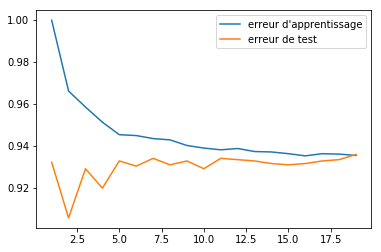

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = {}
score_train = []
score_test = []

k_range = range(1,20)

for k in k_range:
   knn[k] =  KNeighborsClassifier(n_neighbors=k)
   knn[k].fit(X_train,y_train)
   score_train.append(knn[k].score(X_train,y_train))
   score_test.append(knn[k].score(X_test,y_test))

k_best = np.argmax(score_test)

print('Score de test du meilleur prédicteur kNN:',score_test[k_best])

plt.plot(list(k_range),score_train,label='erreur d\'apprentissage')
plt.plot(list(k_range),score_test,label='erreur de test')
plt.legend()
plt.show()


La régression logistique donne le meilleur prédicteur. Le meilleur prédicteur kNN est légèrement moins bon. Le perceptron est nettement moins bon.

# Question 7

In [13]:
pd.crosstab(y_test,f.predict(X_test))

col_0,red,white
style,,
red,358,36
white,30,1201


Dans la matrice de confusion, les lignes correspondent aux étiquettes réelles, et les colonnes aux étiquettes prédites. Pour chaque étiquette prédite, on a le nombre correspondant de chaque étiquette réelle. On remarque remarque qu'en proportition, un vin rouge est plus souvent prédit comme vin blanc que l'inverse.

# Question 8

In [14]:
from sklearn.utils import resample,shuffle
test_label_counts = y_test.value_counts()
X_test_white = X_test[y_test=='white']
y_test_white = y_test[y_test=='white']
X_test_less_white, y_test_less_white = resample(X_test_white,y_test_white,n_samples=test_label_counts['red'],replace=False)
X_test_ = pd.concat([X_test_less_white,X_test[y_test=='red']])
y_test_ = pd.concat([y_test_less_white,y_test[y_test=='red']])
X_test_, y_test_ = shuffle(X_test_,y_test_)
print(y_test_.value_counts())

white    394
red      394
Name: style, dtype: int64


# Question 9

In [15]:
print('Régression logistique:', f.score(X_test_,y_test_))
print('Peceptron:', perceptron.score(X_test_,y_test_))
print('Meilleur kNN:',knn[k_best].score(X_test_,y_test_))

Régression logistique: 0.9441624365482234
Peceptron: 0.5901015228426396
Meilleur kNN: 0.8972081218274112


Lorsque l'échantillon de test contient autant de vins rouges que de vins blancs, le score de chaque prédicteur est légèrement intérieur.

# Question 10

In [16]:
train_label_counts = y_train.value_counts()
X_train_white = X_train[y_train=='white']
y_train_white = y_train[y_train=='white']
X_train_less_white, y_train_less_white = resample(X_train_white,y_train_white,n_samples=train_label_counts['red'],replace=False)
X_train_ = pd.concat([X_train_less_white,X_train[y_train=='red']])
y_train_ = pd.concat([y_train_less_white,y_train[y_train=='red']])
X_train_, y_train_ = shuffle(X_train_,y_train_)
print(y_train_.value_counts())

white    1205
red      1205
Name: style, dtype: int64


In [17]:
f_ = LogisticRegression()
f_.fit(X_train_, y_train_)
print('Régression logistique:', f_.score(X_test_,y_test_))

perceptron_ = Perceptron()
perceptron_.fit(X_train_,y_train_)
print('Perceptron:', perceptron_.score(X_test_,y_test_))

knn_ = {}
score_train = []
score_test = []
k_range = range(1,20)
for k in k_range:
   knn_[k] =  KNeighborsClassifier(n_neighbors=k)
   knn_[k].fit(X_train_,y_train_)
   score_test.append(knn_[k].score(X_test_,y_test_))
k_best = np.argmax(score_test)
print('Meilleur kNN:', score_test[k_best])


Régression logistique: 0.9517766497461929
Perceptron: 0.7411167512690355
Meilleur kNN: 0.899746192893401


/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Même si on a réduit la taille de l'échantillon d'apprentissage, du fait que celui-ci contienne autant de vins rouges que de vins blancs, on observe une légère amélioration des scores des prédicteurs obtenus.

# Question 11

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='style'), data['style'])

train_label_counts = y_train.value_counts()
X_train_white = X_train[y_train=='white']
y_train_white = y_train[y_train=='white']
X_train_less_white, y_train_less_white = resample(X_train_white,y_train_white,n_samples=train_label_counts['red'],replace=False)
X_train_ = pd.concat([X_train_less_white,X_train[y_train=='red']])
y_train_ = pd.concat([y_train_less_white,y_train[y_train=='red']])
X_train_, y_train_ = shuffle(X_train_,y_train_)

test_label_counts = y_test.value_counts()
X_test_white = X_test[y_test=='white']
y_test_white = y_test[y_test=='white']
X_test_less_white, y_test_less_white = resample(X_test_white,y_test_white,n_samples=test_label_counts['red'],replace=False)
X_test_ = pd.concat([X_test_less_white,X_test[y_test=='red']])
y_test_ = pd.concat([y_test_less_white,y_test[y_test=='red']])
X_test_, y_test_ = shuffle(X_test_,y_test_)

f_ = LogisticRegression()
f_.fit(X_train_, y_train_)
print('Régression logistique:',f_.score(X_test_,y_test_))

perceptron_ = Perceptron()
perceptron_.fit(X_train_,y_train_)
print('Perceptron', perceptron_.score(X_test_,y_test_))

knn_ = {}
score_train = []
score_test = []
k_range = range(1,20)
for k in k_range:
   knn_[k] =  KNeighborsClassifier(n_neighbors=k)
   knn_[k].fit(X_train_,y_train_)
   score_test.append(knn_[k].score(X_test_,y_test_))
k_best = np.argmax(score_test)
print('Meilleur kNN', score_test[k_best])


Régression logistique: 0.9798387096774194
Perceptron 0.9086021505376344
Meilleur kNN 0.9274193548387096


/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


On observe une amélioration légère pour la régression logistique et kNN, et une amélioration nette pour le perceptron.